In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

1. Загрузите первые 400 строк прилагающегося датасета diabetes.csv.

In [9]:
data = pd.read_csv('diabetes.csv', nrows=400)

2. Сделайте количественное описание датасета: число признаков, статистику по признакам.

In [10]:
print("Число признаков:", len(data.columns))
print("Статистика по признакам:")
print(data.describe())

Число признаков: 9
Статистика по признакам:
       Pregnancies    Glucose  BloodPressure  SkinThickness     Insulin  \
count   400.000000  400.00000     400.000000     400.000000  400.000000   
mean      3.952500  121.24000      69.060000      20.327500   81.250000   
std       3.369514   32.68437      19.011575      15.599796  121.597254   
min       0.000000    0.00000       0.000000       0.000000    0.000000   
25%       1.000000  100.00000      64.000000       0.000000    0.000000   
50%       3.000000  116.50000      71.000000      23.000000   36.000000   
75%       6.000000  143.00000      80.000000      32.000000  128.250000   
max      17.000000  197.00000     122.000000      60.000000  846.000000   

             BMI  DiabetesPedigreeFunction         Age     Outcome  
count  400.00000                400.000000  400.000000  400.000000  
mean    32.10775                  0.487915   33.092500    0.380000  
std      8.13714                  0.349619   11.325396    0.485994  
min 

3. Отделите целевую переменную Outcome.

In [11]:
X = data.drop(columns='Outcome')
y = data['Outcome']

4. Разделите данные на обучающую и валидационную выборки при помощи train_test_split из библиотеки sklearn.model_selection в соотношении 80-20 (для этого укажите параметр test_size=0.2) с перемешиванием, указав значение параметра random_state=42.

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

5. Создайте объект DecisionTreeClassifier(random_state=1). Обучите модель на обучающих (трейновых) данных. Сделайте предсказание на трейновом и валидационном наборе признаков. Выведите значения метрики f1-scoreдля трейнового и валидационного наборов данных. По полученным значениям метрик сделайте предположение о переобученности модели.

In [13]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)
train_f1 = f1_score(y_train, train_preds)
val_f1 = f1_score(y_val, val_preds)
print("F1-score на тренировочной выборке:", train_f1)
print("F1-score на валидационной выборке:", val_f1)
if train_f1 > val_f1:
    print("Модель склонна к переобучению")
else:
    print("Модель не склонна к переобучению")

F1-score на тренировочной выборке: 1.0
F1-score на валидационной выборке: 0.6363636363636364
Модель склонна к переобучению


6. Произведите кросс-валидацию с использованием функции cross_validate из библиотеки sklearn.model_selection. По полученным данным, постройте график зависимости значений f1-score от набора данных соответствующей итерации. По графику убедитесь в том, что имеет место переобученность модели.

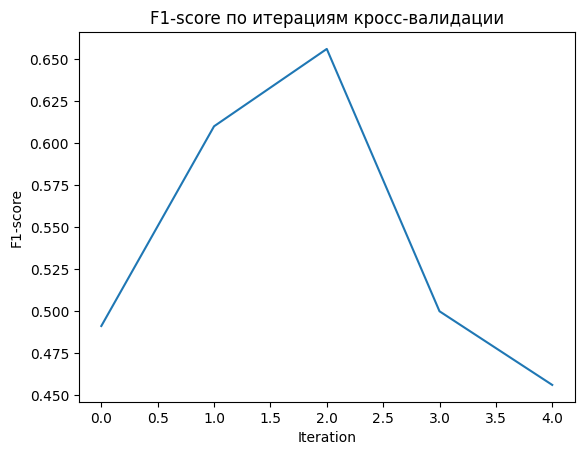

In [14]:
cv_results = cross_validate(model, X, y, cv=5, scoring=make_scorer(f1_score))
plt.plot(cv_results['test_score'])
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('F1-score по итерациям кросс-валидации')
plt.show()

7. Для борьбы с переобучением регуляризуйте модель DecisionTreeClassifier, уменьшив глубину дерева, указав параметр регуляризации max_depth=3.

In [15]:
regularized_model = DecisionTreeClassifier(random_state=1, max_depth=3)
regularized_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

8. Снова проделайте пункт 6 с учётом регуляризации и убелитесь по графику в том, что модель больше не является переобученной.

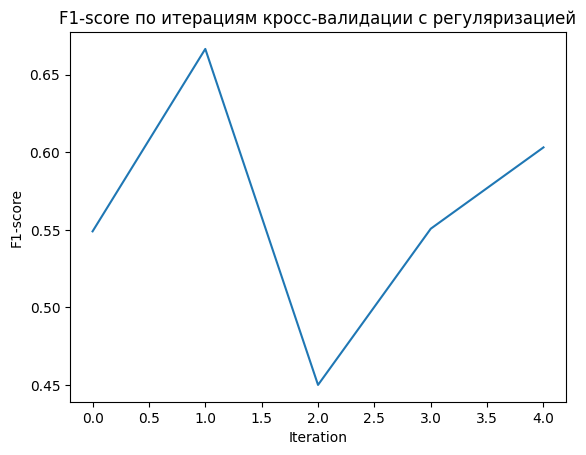

In [16]:
cv_results_regularized = cross_validate(regularized_model, X, y, cv=5, scoring=make_scorer(f1_score))
plt.plot(cv_results_regularized['test_score'])
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('F1-score по итерациям кросс-валидации с регуляризацией')
plt.show()

9. Теперь рассмотрите проблему недообучения модели. Для борьбы с недообучением модели добавьте данные. Для этого загрузите все строки датасета diabetes.csv.

In [17]:
full_data = pd.read_csv('diabetes.csv')
X_full = full_data.drop(columns='Outcome')
y_full = full_data['Outcome']

10. Обучите модель DecisionTreeClassifier(random_state=1, max_depth=3) на всех данных и убедитесь в том, что значение метрики f1-score улучшилось.

In [18]:
model_full = DecisionTreeClassifier(random_state=1, max_depth=3)
model_full.fit(X_full, y_full)
full_preds = model_full.predict(X_full)
full_f1 = f1_score(y_full, full_preds)
print("F1-score на всех данных:", full_f1)

F1-score на всех данных: 0.6653696498054474
